https://drive.google.com/file/d/1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S/view?usp=drive_link


In [ ]:
! gdown --id 1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xirWx4puolCmAoGa8FSGSc1iIbZ5HQ3S
To: /content/Data_base.csv
100% 6.35k/6.35k [00:00<00:00, 21.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data_base.csv')

In [ ]:
plt.style.use('bmh')

In [ ]:
df

,date,system_id,game_id,bet_sum,round_count
0,2022-09-01,1,100,100.000000,10.0
1,2022-09-02,1,100,50.000000,15.0
2,2022-09-03,1,100,250.000000,23.0
3,2022-09-04,1,100,300.000000,14.0
4,2022-09-05,1,100,45.000000,10.0
...,...,...,...,...,...
162,2022-09-26,2,102,141.666667,20.0
163,2022-09-27,2,102,145.000000,20.0
164,2022-09-28,2,102,186.666667,24.5
165,2022-09-29,2,102,144.166667,21.0


In [ ]:
df.dtypes

date            object
system_id        int64
game_id          int64
bet_sum        float64
round_count    float64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:

df['day'] = df['date'].dt.day


In [ ]:
df

,date,system_id,game_id,bet_sum,round_count,day
0,2022-09-01,1,100,100.000000,10.0,1
1,2022-09-02,1,100,50.000000,15.0,2
2,2022-09-03,1,100,250.000000,23.0,3
3,2022-09-04,1,100,300.000000,14.0,4
4,2022-09-05,1,100,45.000000,10.0,5
...,...,...,...,...,...,...
162,2022-09-26,2,102,141.666667,20.0,26
163,2022-09-27,2,102,145.000000,20.0,27
164,2022-09-28,2,102,186.666667,24.5,28
165,2022-09-29,2,102,144.166667,21.0,29


array([[<Axes: title={'center': 'bet_sum'}>]], dtype=object)

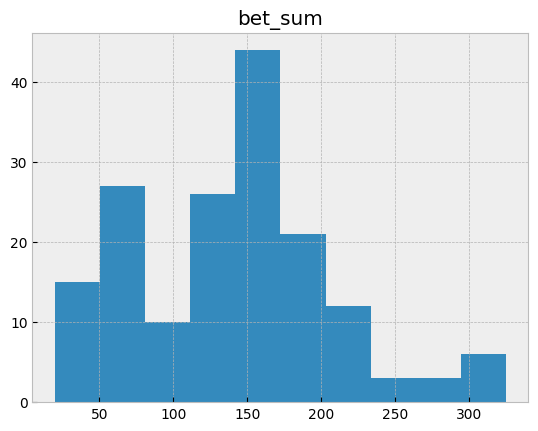

In [ ]:
df.hist('bet_sum')

<Axes: >

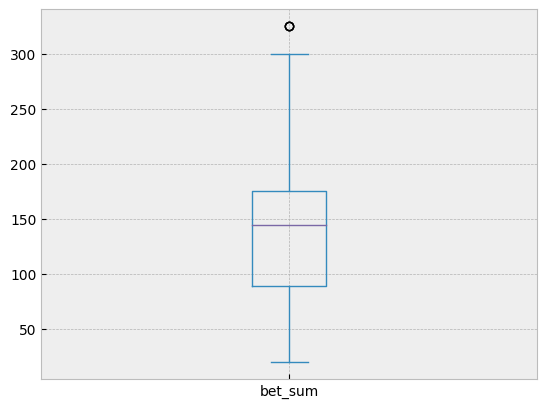

In [ ]:
df['bet_sum'].plot(kind='box')

In [ ]:
df['day_group']= pd.qcut(df['date'],4)

In [ ]:
df.groupby('day_group')['bet_sum'].agg('median')

day_group
(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]    148.166667
(2022-09-07 12:00:00, 2022-09-14]                       132.500000
(2022-09-14, 2022-09-22]                                163.333333
(2022-09-22, 2022-09-30]                                142.500000
Name: bet_sum, dtype: float64

In [ ]:
df.groupby('day_group')['round_count'].agg('median')

day_group
(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]    16.50
(2022-09-07 12:00:00, 2022-09-14]                       17.50
(2022-09-14, 2022-09-22]                                20.00
(2022-09-22, 2022-09-30]                                24.75
Name: round_count, dtype: float64

<Axes: xlabel='date'>

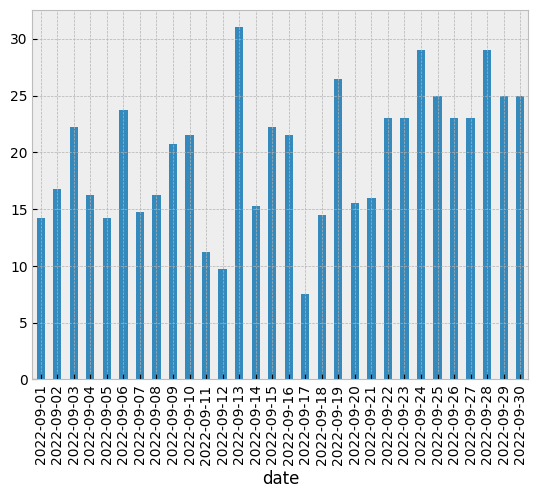

In [ ]:
df.groupby('date')['round_count'].agg('median').plot(ylim=0, grid=True, kind = 'bar')

In [ ]:
df.corr()

<ipython-input-138-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,system_id,game_id,bet_sum,round_count,day
system_id,1.000000,0.105641,0.272960,-0.006390,-0.083386
game_id,0.105641,1.000000,-0.014768,-0.112569,0.104352
bet_sum,0.272960,-0.014768,1.000000,0.440125,0.001942
round_count,-0.006390,-0.112569,0.440125,1.000000,0.389473
day,-0.083386,0.104352,0.001942,0.389473,1.000000


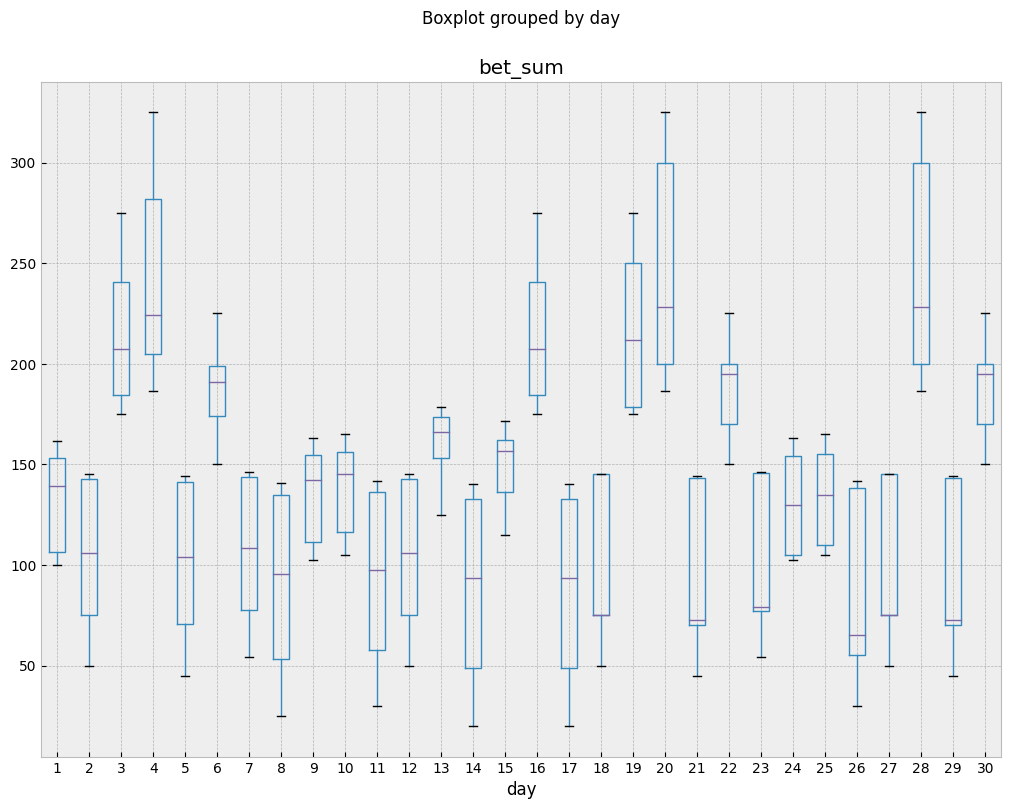

In [ ]:
df.boxplot(column='bet_sum', by='day', figsize=(12,9))
plt.show()

In [ ]:
! pip install phik

In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['system_id', 'game_id', 'bet_sum', 'round_count', 'day']


In [ ]:
phik_overview

,date,system_id,game_id,bet_sum,round_count,day,day_group
date,1.000000,0.000000,0.000000,0.680418,0.659768,1.000000,1.000000
system_id,0.000000,1.000000,0.036308,0.906103,0.449808,0.000000,0.000000
game_id,0.000000,0.036308,1.000000,0.560737,0.467578,0.000000,0.000000
bet_sum,0.680418,0.906103,0.560737,1.000000,0.502458,0.254085,0.231612
round_count,0.659768,0.449808,0.467578,0.502458,1.000000,0.457792,0.440890
day,1.000000,0.000000,0.000000,0.254085,0.457792,1.000000,0.963149
day_group,1.000000,0.000000,0.000000,0.231612,0.440890,0.963149,1.000000


Text(0.5, 1.0, 'Heatmap correlation Phik (𝜙k)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


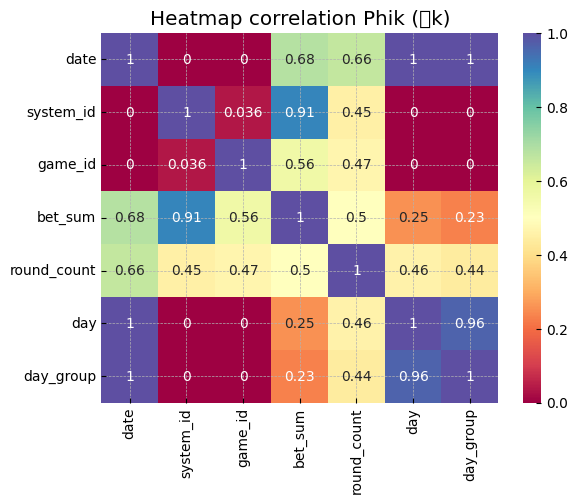

In [ ]:
sns.heatmap(phik_overview, cmap='Spectral', annot=True)
plt.title('Heatmap correlation Phik (𝜙k)')

In [ ]:
phik_overview['bet_sum'].sort_values(ascending=False)


bet_sum        1.000000
system_id      0.906103
date           0.680418
game_id        0.560737
round_count    0.502458
day            0.254085
day_group      0.231612
Name: bet_sum, dtype: float64

In [ ]:
df['date_group']= pd.qcut(df['date'],4)

In [ ]:
df.groupby('date_group')['bet_sum'].agg(['mean','median'])

,mean,median
date_group,,
"(2022-08-31 23:59:59.999999999, 2022-09-07 12:00:00]",155.952381,148.166667
"(2022-09-07 12:00:00, 2022-09-14]",115.555556,132.500000
"(2022-09-14, 2022-09-22]",161.589147,163.333333
"(2022-09-22, 2022-09-30]",135.050000,142.500000


<Axes: xlabel='date_group'>

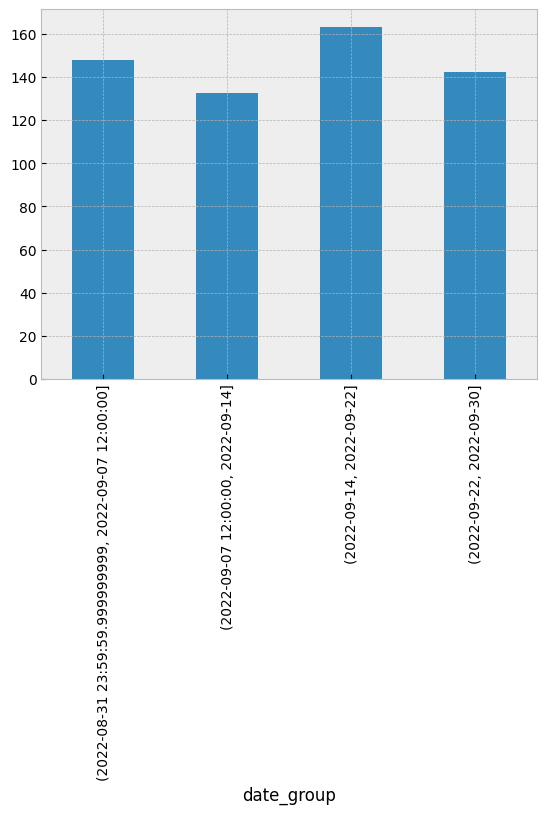

In [ ]:
df.groupby('date_group')['bet_sum'].agg('median').plot(ylim=0,grid=True,kind = 'bar')

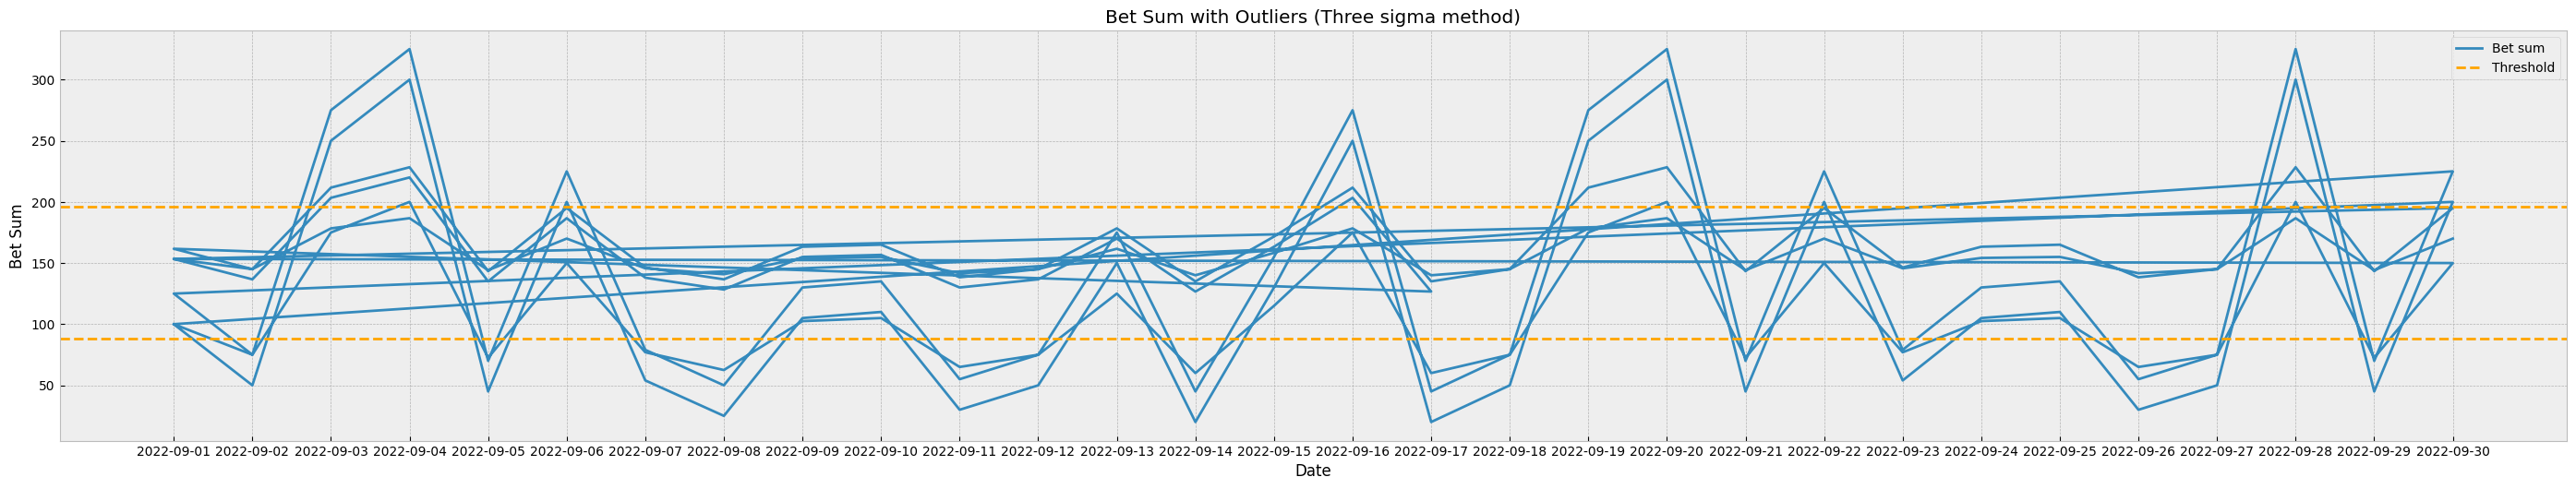

In [ ]:
def detect_outliers(df, bet_sum):
    mean = df[bet_sum].mean()
    std = df[bet_sum].std()
    threshold = 3 * std

    outliers = df[(df[bet_sum] > mean + threshold ) | (df[bet_sum] < mean - threshold)]
    return outliers


outliers = detect_outliers(df, 'bet_sum')


plt.figure(figsize=(28, 10))

plt.subplot(2, 1, 1)
plt.plot(df['date'], df['bet_sum'], label='Bet sum')
plt.scatter(outliers['date'], outliers['bet_sum'],)
plt.axhline(mean + threshold, color='orange', linestyle='--', label='Threshold')
plt.axhline(mean - threshold, color='orange', linestyle='--')
plt.title('Bet Sum with Outliers (Three sigma method)')
plt.xlabel('Date')
plt.ylabel('Bet Sum')
plt.legend()

plt.tight_layout()
plt.show()

